In [3]:
!pip install torchvision torch

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

# Torch Utilities
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim

# Step 1

In [5]:
# Download the datasets (Train/Test)
# Using transforms to convert the data to tensors
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                               ])

train_set = torchvision.datasets.MNIST( root='./data/',
                                        train=True,
                                        download=True,
                                        transform = transform)#Normalized
test_set = torchvision.datasets.MNIST( root='./data/',
                                        train=False,
                                        download=True,
                                        transform = transforms.ToTensor())


In [6]:
# Train Set - DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100,shuffle=True)

In [7]:
data=iter(train_loader)
samples,labels=next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([100, 1, 28, 28])
number of labels torch.Size([100])


In [8]:
# Create training set and define training dataloader
train_set_norm = torchvision.datasets.MNIST( root='./data/',
                                        train=True,
                                        download=True,
                                        transform = transform)#Normalized
# Train Set - DataLoader
train_loader_norm = torch.utils.data.DataLoader(train_set_norm, batch_size=128,shuffle=True)


In [9]:
# Batch - Train set
images, labels = next(iter(train_loader))
images = images.numpy()

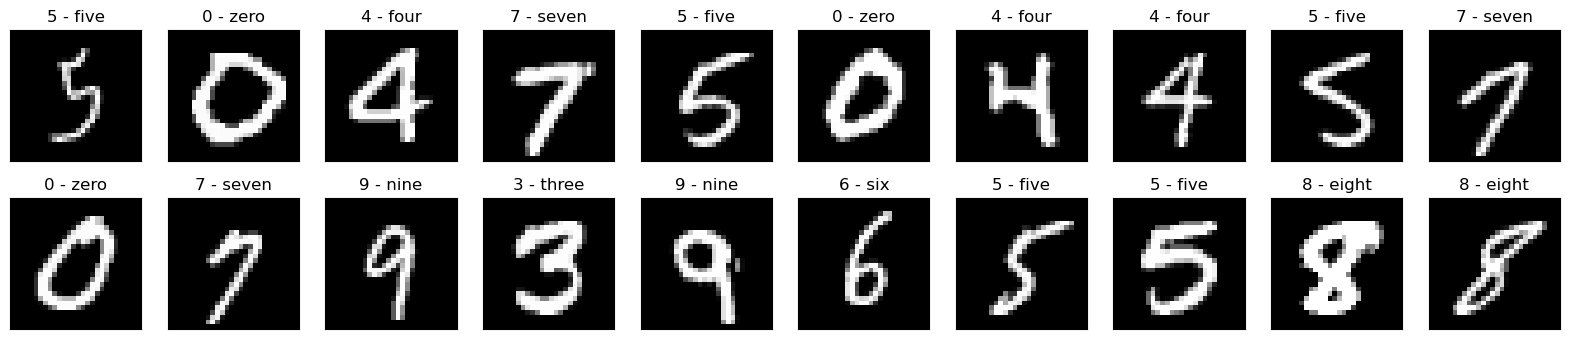

In [10]:
# Plot the batch and labels
fig = plt.figure(figsize=(20, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(train_set.classes[labels[i].item()])

plt.show()
# fig.savefig('visualizations/train_samples.png', bbox_inches='tight')
# plt.close()

In [11]:
print('Train set - lenght:', len(train_set)) 
print('Test set - lenght:', len(test_set), '(',round(len(test_set)/len(train_set),3)*100,'% )') 

Train set - lenght: 60000
Test set - lenght: 10000 ( 16.7 % )


In [12]:
# Classes
print('Train set - Classes:', train_set.classes) 

Train set - Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [13]:
# Count of each class in train_set
train_set.targets.bincount()  

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [30]:
# Count of each class in test_set
test_set.targets.bincount()  

tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

# Step 2

In [15]:
# Set the loaders
train_set = torchvision.datasets.MNIST( root='./data/',
                                        train=True,
                                        download=True,
                                        transform = transforms.ToTensor())
test_set = torchvision.datasets.MNIST( root='./data/',
                                        train=False,
                                        download=True,
                                        transform = transforms.ToTensor())


In [16]:
# Test set - DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64,shuffle=True)

# Step 3

In [17]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [18]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [19]:
# The nn.module in pytorch help us to create the artificial neural network .nn.Linear makes the linear connection between feature and neuron &Torch.nn.functional module consists of all the activation functions and output function#

In [20]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [21]:
#Optimizers 
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
time0 = time()
epochs = 15

In [22]:
#Run Model
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.30710989248349085

Training Time (in minutes) = 0.09833954572677613
Epoch 1 - Training loss: 0.10864342323619562

Training Time (in minutes) = 0.19733682076136272
Epoch 2 - Training loss: 0.07878670083961563

Training Time (in minutes) = 0.2976103941599528
Epoch 3 - Training loss: 0.0578318000180341

Training Time (in minutes) = 0.39801936944325766
Epoch 4 - Training loss: 0.04970836079363445

Training Time (in minutes) = 0.49608322779337566
Epoch 5 - Training loss: 0.039891094739541666

Training Time (in minutes) = 0.5951893885930379
Epoch 6 - Training loss: 0.030065385815585707

Training Time (in minutes) = 0.6942370255788167
Epoch 7 - Training loss: 0.03021096061098018

Training Time (in minutes) = 0.7944233616193136
Epoch 8 - Training loss: 0.02422477146836188

Training Time (in minutes) = 0.8965463240941366
Epoch 9 - Training loss: 0.02271436937036133

Training Time (in minutes) = 0.9966357827186585
Epoch 10 - Training loss: 0.019205417837770595

Trainin

In [23]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


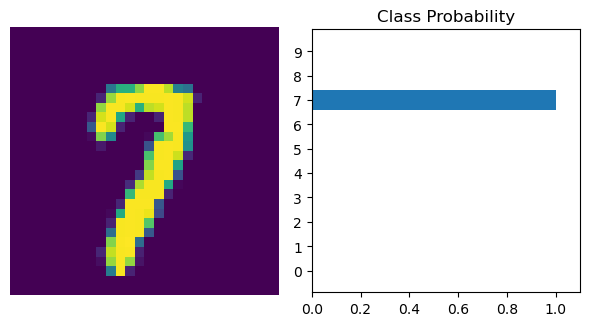

In [24]:
#Validation 
images, labels = next(iter(test_loader))

img = images[0].view(1, 784) 
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [25]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 157

Model Accuracy = 0.9808917197452229


In [26]:
#Saving the model
torch.save(model, './my_mnist_model.pt') 

In [27]:
#------------- END -------------------------

In [28]:
#Useful

In [29]:
# create a function (this my favorite choice)
def RMSELoss(predicted,target):
    return torch.sqrt(torch.mean((predicted-target)**2))

criterion = RMSELoss

# loss = torch.sqrt(criterion(x, y))
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 300

n_total_steps = len(train_dataset)

trainingEpoch_loss = []
validationEpoch_loss = []

for epoch in range(epochs):
    step_loss = []
    model.train()
    for i, data in enumerate(train_dataset):
        feature,target = data['data'].type(torch.FloatTensor),torch.tensor(data['target']).type(torch.FloatTensor)
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        outputs = model(feature)
        # Find the Loss
        training_loss = criterion(outputs, target)
        # Calculate gradients
        training_loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        step_loss.append(training_loss.item())
        if (i+1) % 1 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {training_loss.item():.4f}')
    trainingEpoch_loss.append(np.array(step_loss).mean())
 
    model.eval()     # Optional when not using Model Specific layer
    for i, data in enumerate(val_dataset):
        validationStep_loss = []
        feature,target = data['data'].type(torch.FloatTensor),torch.tensor(data['target']).type(torch.FloatTensor)
        
        # Forward Pass
        outputs = model(feature)
        # Find the Loss
        validation_loss = criterion(outputs, target)
        # Calculate Loss
        validationStep_loss.append(validation_loss.item())
    validationEpoch_loss.append(np.array(validationStep_loss).mean())

NameError: name 'train_dataset' is not defined

In [ ]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []
for epoch in range(epochs):
        for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()
                train_losses.append(loss_train.item())

#testing loop goes here
val_losses.append(loss_val.item())

plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()